In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from common_plotting import read_data, plot, years, months, yearsFmt, find_file
from common_analysis_resistance import (add_sr104_temp, add_pt100_temp)


In [2]:
pt100_data = pd.read_csv(find_file('ks3458a-k2000-20-res-tempco-log.csv'), parse_dates=['datetime']).set_index('datetime')
pt100_data2 = pd.read_csv(find_file('k2000-20-4w-res-log.csv'), parse_dates=['datetime'], low_memory=False).set_index('datetime')
pt100_data2 = pt100_data2[pt100_data2['dut'] == 'Pt100']

In [3]:
# From https://us.flukecal.com/pt100-calculator for PT-385
R0 = 100
A = 3.9083e-3
B = -5.775e-7
PT385_eq = lambda t, Rt: R0 * (1 + A*t + B*(t**2)) - Rt
fsolve(PT385_eq, 30, args=(109.80,))[0]
fsolve(PT385_eq, 30, args=(109.24,))[0]

23.72516572801329

<Axes: xlabel='datetime'>

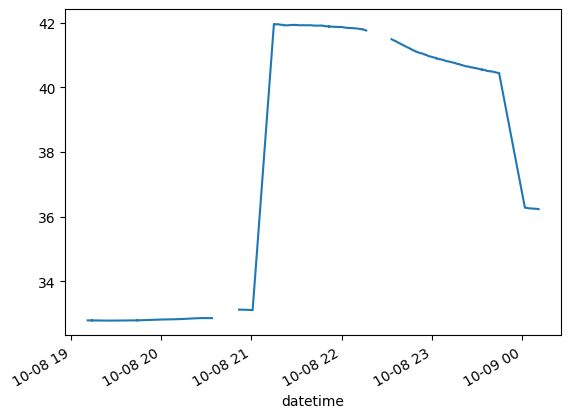

In [4]:
pt100_data['pt100_temperature'] = pt100_data['k2000_20_pt100_ohm'].dropna().apply(lambda resistance: fsolve(PT385_eq, 25, args=(resistance,))[0])
pt100_data['pt100_temperature'].last('5h').plot()

<Axes: xlabel='datetime'>

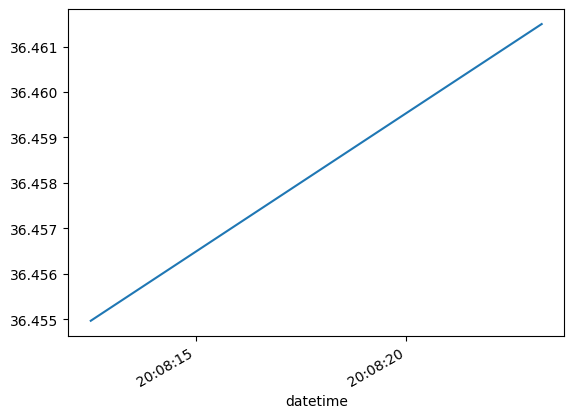

In [5]:
pt100_data2['pt100_temperature'] = pt100_data2['k2000_ohm'].dropna().apply(lambda resistance: fsolve(PT385_eq, 25, args=(resistance,))[0])
pt100_data2['pt100_temperature'].last('5h').plot()

In [6]:
pt100_comparison_data = pd.read_csv(find_file('k2000-x2-4w-res-log.csv'), parse_dates=['datetime']).set_index('datetime')

<Axes: xlabel='datetime'>

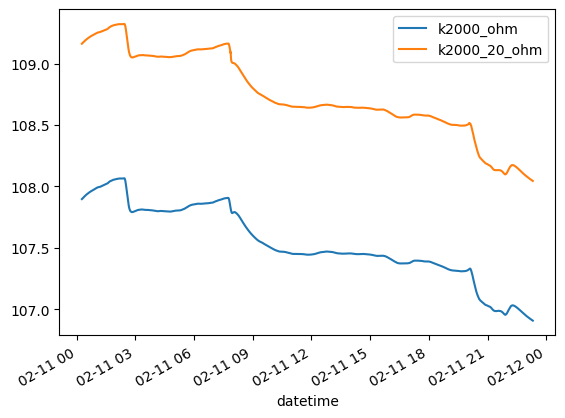

In [7]:
pt100_comparison_data[['k2000_ohm','k2000_20_ohm']].plot()

In [8]:
pt100_data['k2000_20_pt100_ohm']

datetime
2023-10-03 09:29:50.901854           NaN
2023-10-03 09:30:27.078226    111.678043
2023-10-03 09:31:03.281876    111.677585
2023-10-03 09:31:39.437423    111.677395
2023-10-03 09:32:15.591180    111.677254
                                 ...    
2023-10-09 00:08:35.596176    114.090740
2023-10-09 00:09:11.748586    114.088589
2023-10-09 00:09:47.910871    114.088639
2023-10-09 00:10:24.060604    114.087275
2023-10-09 00:11:00.214776    114.085133
Name: k2000_20_pt100_ohm, Length: 13273, dtype: float64

In [18]:
pt100_comparison_data2 = pd.read_csv(find_file('ks3458a-k2000-x2-sr104-log.csv'), parse_dates=['datetime']).set_index('datetime')
add_sr104_temp(pt100_comparison_data2, 'k2000_temp_ohm')
add_pt100_temp(pt100_comparison_data2, 'k2000_20_pt100_ohm')
pt100_comparison_data2_1 = pt100_comparison_data2[pt100_comparison_data2.index < '2023-3-3']
pt100_comparison_data2_2 = pt100_comparison_data2[(pt100_comparison_data2.index > '2023-10-1') & (pt100_comparison_data2.index < '2023-10-23')]
pt100_comparison_data2_3 = pt100_comparison_data2[(pt100_comparison_data2.index >= '2023-10-24')]

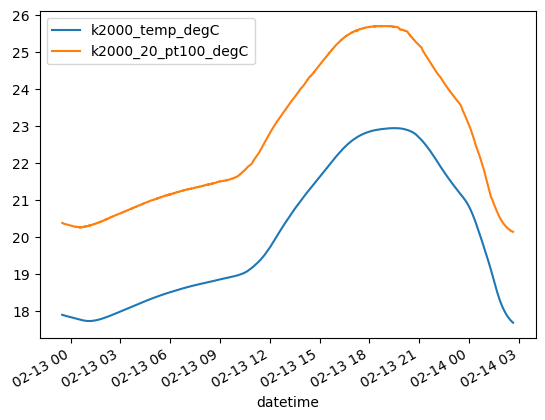

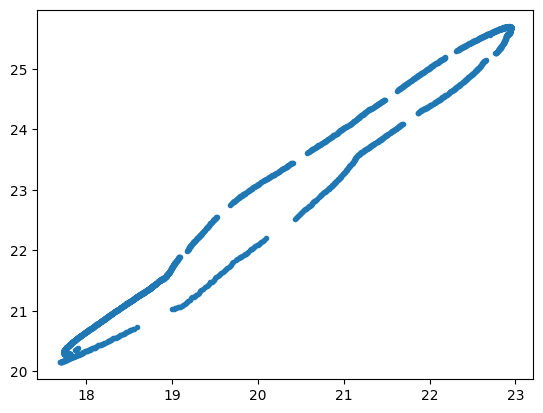

In [10]:
pt100_comparison_data2_1[['k2000_temp_degC', 'k2000_20_pt100_degC']].plot()
plt.show()
plt.plot(pt100_comparison_data2_1['k2000_temp_degC'], pt100_comparison_data2_1['k2000_20_pt100_degC'], '.')

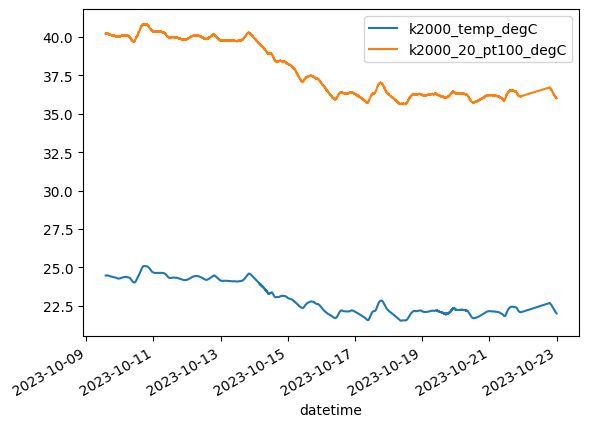

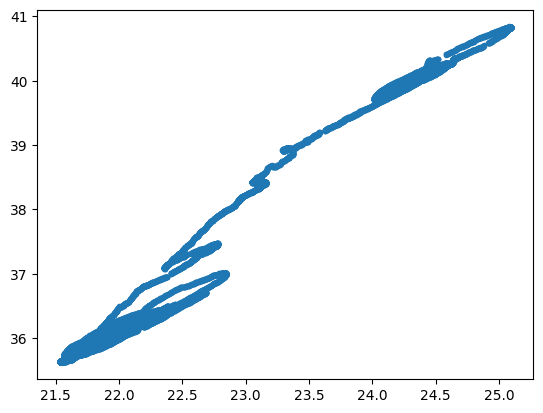

In [11]:
pt100_comparison_data2_2[['k2000_temp_degC', 'k2000_20_pt100_degC']].plot()
plt.show()
plt.plot(pt100_comparison_data2_2['k2000_temp_degC'], pt100_comparison_data2_2['k2000_20_pt100_degC'], '.')

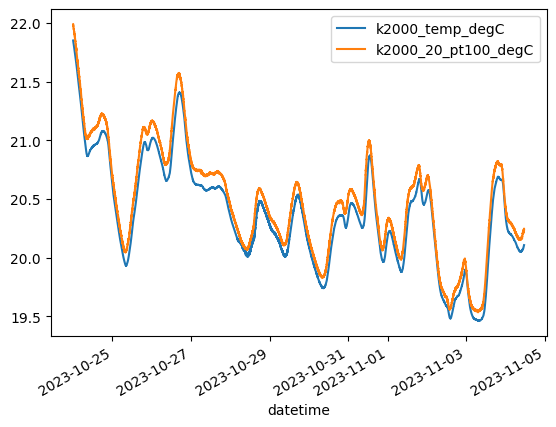

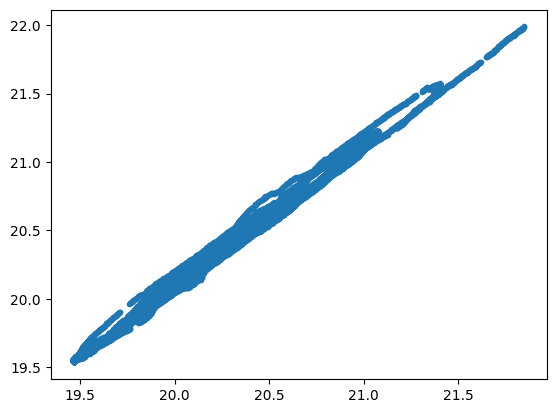

In [22]:
pt100_comparison_data2_3[['k2000_temp_degC', 'k2000_20_pt100_degC']].plot()
plt.show()
plt.plot(pt100_comparison_data2_3['k2000_temp_degC'], pt100_comparison_data2_3['k2000_20_pt100_degC'], '.')